# Mutil class Image Classification

We have just been through a bunch of following steps with a binary classification problem - pizza vs steak, now we are going to step things up a notch with 10 classes of food (multi class classification problem)
1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. EValute the model
6. Adjust different hyper parameters and improve our model (try to beat baseline/overfitting)
7. Repeak until satisfied

## 1. Become one with the data

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-09-25 18:41:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.128, 108.177.111.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   190MB/s    in 2.6s    

2021-09-25 18:41:05 (190 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
!ls 10_food_classes_all_data/train

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [ ]:
import os
# Lets walk though our data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 10 directories and 0 images in 10_fo

In [ ]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/' 

In [ ]:
os.listdir('10_food_classes_all_data/train')

['pizza',
 'hamburger',
 'steak',
 'sushi',
 'fried_rice',
 'chicken_wings',
 'chicken_curry',
 'ramen',
 'grilled_salmon',
 'ice_cream']

In [ ]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Visualize, visualize and visualize
import random
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
# Lets create a function to view a random image
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  # Lets read the image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(f'Random image : {random_image}')

  # Lets read the image
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.title(f'class_name : {target_class}')
  plt.axis('off')
  plt.imshow(img)
  return img


Random image : ['357137.jpg']


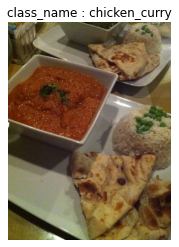

In [ ]:
img = view_random_image(train_dir, random.choice(class_names))

## 2. Preprocess the data (prepare it for model)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loas data from the directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a base line)
We have been talking a lot about CNN explainer website..how about we take their model which is also on 10 classes and use it on our problem
https://poloclub.github.io/cnn-explainer/

In [ ]:
# Set the random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
 tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        padding='valid',
                        input_shape=(224,224,3),
                        activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax') # change to have 10 classes and activation function as softmax
])

# Compile the model

model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 89s 240ms/step - loss: 2.0765 - accuracy: 0.2552 - val_loss: 1.9386 - val_accuracy: 0.3192
Epoch 2/5
235/235 [==============================] - 54s 231ms/step - loss: 1.8398 - accuracy: 0.3655 - val_loss: 1.8676 - val_accuracy: 0.3496
Epoch 3/5
235/235 [==============================] - 56s 239ms/step - loss: 1.5096 - accuracy: 0.4904 - val_loss: 1.9554 - val_accuracy: 0.3380
Epoch 4/5
235/235 [==============================] - 56s 239ms/step - loss: 1.0196 - accuracy: 0.6609 - val_loss: 2.3293 - val_accuracy: 0.3296
Epoch 5/5
235/235 [==============================] - 55s 235ms/step - loss: 0.5028 - accuracy: 0.8419 - val_loss: 2.8594 - val_accuracy: 0.3104


## 5. Evaluate the model

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 2.8594 - accuracy: 0.3104


[2.859421491622925, 0.31040000915527344]

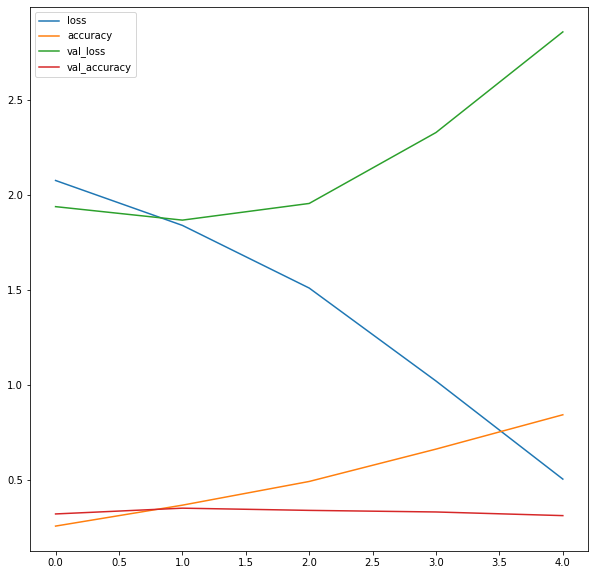

In [ ]:
import pandas as pd
# Plot the learning curves
pd.DataFrame(history_1.history).plot(figsize=(10,10))

In [ ]:
print(history_1.history['loss'])

[2.076482057571411, 1.8398269414901733, 1.509588360786438, 1.0196336507797241, 0.5028143525123596]


In [ ]:
# Plot the learning curves separately
# Lets define a function
def plot_loss_curves(history):
  train_loss = history.history['loss']
  valid_loss = history.history['val_loss']

  train_accuracy = history.history['accuracy']
  test_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot the curves
  plt.plot(epochs, train_loss, label='Training loss')
  plt.plot(epochs, valid_loss, label='Test loss')
  plt.title('Loss Curves')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, train_accuracy, label='Training accuracy')
  plt.plot(epochs, test_accuracy, label='Test accuracy')
  plt.title('Accuarcy Curves')
  plt.xlabel('epochs')
  plt.legend()

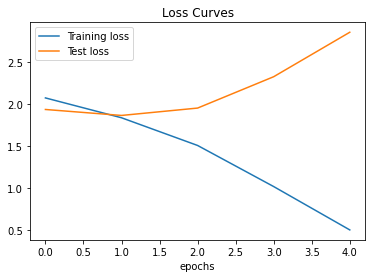

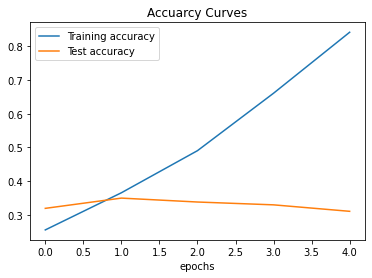

In [ ]:
plot_loss_curves(history_1)

What do these loss curves tell us??


Well, it seems that our model is overfitting the training set badly, in other words it is getting great results on the training data but fails to generalize for the unseen data and performs poorly on the test dataset...

## 6. Adjust the model hyper parameters to beat the our baseline or overfitting

Due to its performance on training data, it is clear that our model is learning something but not generalizing to the new data (overfitting)
So lets try and fix overfitting by...
1. **Get more data** - having more data gives a model more opportunity to learn more diverse patterns..
2. **Simplify the model** - If the curren model is overfitting the data, it is may be too complicated a model, one way to simplify the model is to reduce # of layers or reduce # of hidden units in layers 
3. **Data Augmentation** - Data augmentation manipulates the training data in such a way to add more diversity to it without altering the original data.
**Use Transfer Learning** - Transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [ ]:
# How about we try and simplify the model first
# Lets try to remove two convolutional layers...

# Lets build the simplified model
model_2 = tf.keras.Sequential([
 tf.keras.layers.Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, epochs=5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 213ms/step - loss: 2.1012 - accuracy: 0.2515 - val_loss: 1.9036 - val_accuracy: 0.3444
Epoch 2/5
235/235 [==============================] - 50s 215ms/step - loss: 1.7379 - accuracy: 0.4117 - val_loss: 1.8627 - val_accuracy: 0.3488
Epoch 3/5
235/235 [==============================] - 50s 212ms/step - loss: 1.3870 - accuracy: 0.5529 - val_loss: 1.9438 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 50s 213ms/step - loss: 0.9079 - accuracy: 0.7164 - val_loss: 2.1827 - val_accuracy: 0.3252
Epoch 5/5
235/235 [==============================] - 51s 218ms/step - loss: 0.5038 - accuracy: 0.8595 - val_loss: 2.5998 - val_accuracy: 0.3068


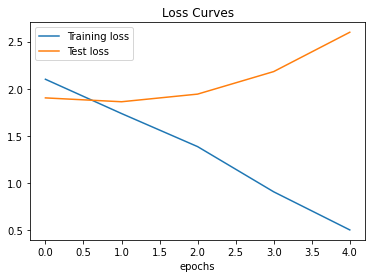

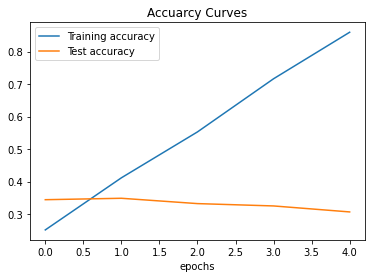

In [ ]:
# Check out the loss curves
plot_loss_curves(history_2)

In [ ]:
model_2.summary(),  model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

(None, None)

Looks like our simplifying the model experiment didn't work out
the accuracy went down and overfitting continued...
How about we try data augmentation???

## Trying to reduce overfitting by data augmentation

Lets try and improve our model's result by augmenting the training data

Ideally we want to :
* Reduce overfitting (get the train and validation loss curves come closer)
* Improve validation accuracy 

In [ ]:
# Lets  create an augmeneted ImageDataGenerator Instance
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True)


Found 7500 images belonging to 10 classes.


In [ ]:
# Lets create another model but this time we will fit it on the augmented training data
model_3 = tf.keras.Sequential([
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented, epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data= test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 135s 573ms/step - loss: 2.2804 - accuracy: 0.1368 - val_loss: 2.1538 - val_accuracy: 0.2116
Epoch 2/5
235/235 [==============================] - 131s 559ms/step - loss: 2.1364 - accuracy: 0.2279 - val_loss: 1.9660 - val_accuracy: 0.2832
Epoch 3/5
235/235 [==============================] - 131s 556ms/step - loss: 2.0592 - accuracy: 0.2660 - val_loss: 1.9463 - val_accuracy: 0.3100
Epoch 4/5
235/235 [==============================] - 132s 563ms/step - loss: 1.9978 - accuracy: 0.3065 - val_loss: 1.8018 - val_accuracy: 0.3708
Epoch 5/5
235/235 [==============================] - 131s 556ms/step - loss: 1.9513 - accuracy: 0.3231 - val_loss: 1.8102 - val_accuracy: 0.3800


In [ ]:
model_3.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 1.8102 - accuracy: 0.3800


[1.8102139234542847, 0.3799999952316284]

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 2.5998 - accuracy: 0.3068


[2.599760055541992, 0.3068000078201294]

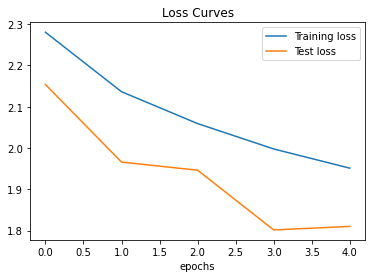

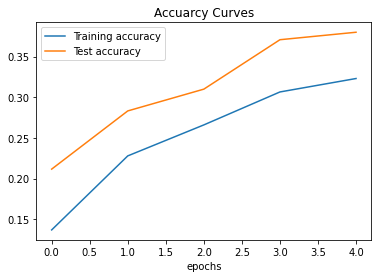

In [ ]:
plot_loss_curves(history_3)

Woah!! that looks much better, loss curves are much closer to each other than base line model and heading in the right directions, so if we were to train for longer, we might see further improvement

## 7. Repeat until satisfied
We could keep going, continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy

How??
* By running lots of experiments
- restructuring the model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in out ImageDataGenerator instance)
- Try training for longer e.g. 10 epochs instead of 5 epochs
- try **transfer learning** 

### Lets make a prediction with our trained model
Lets use our trained model to make predictions on our custom images

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg


--2021-09-25 19:02:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-09-25 19:02:28 (34.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

--2021-09-25 19:02:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200

In [ ]:
def load_and_prep(filename, img_shape=224):
  # Read the image
  img = tf.io.read_file(filename)
  # Covert the image into a tensor
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale the image
  img = img/255.

  return img

In [ ]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
def pred_and_plot(model, filename, class_names):
  #import the target image and preprocess it
  img = load_and_prep(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  

  # Add in logic for multiclass & get the predicted class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  
  # Plot the image and the predicted class
  plt.imshow(img)
  print(f"Prediction : {pred_class}")
  plt.axis('off')


[[0.01414552 0.07262091 0.02431711 0.1778361  0.07390001 0.11303618
  0.01855794 0.06694411 0.39630425 0.04233783]]
Prediction : steak


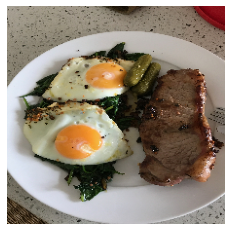

In [ ]:
# Test out model on a custom image
pred_and_plot(model_3, '03-steak.jpeg', class_names)

## The above pred_and_plot function work with binary classification too

**NOTE**: Looks like our model didn't perform very well on our custom images
This is beacause it only achieved ~ 39% accuracy on the test data. So we can expect it to function quite poorly on unseen data.

## Saving and loading our model

In [ ]:
# Save a model
model_3.save('saved_trained_model_3')


INFO:tensorflow:Assets written to: saved_trained_model_3/assets


In [ ]:
# Load in a trained model and evaluate it 
loaded_model_3 = tf.keras.models.load_model('saved_trained_model_3')
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.8102 - accuracy: 0.3800


[1.8102144002914429, 0.3799999952316284]

In [ ]:
# Compare our loaded model with existing model
model_3.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 1.8102 - accuracy: 0.3800


[1.810214638710022, 0.3799999952316284]